This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 17 behavioral variables.

Following is the Data Dictionary for Credit Card dataset:

- CUSTID: Identification of Credit Card holder (Categorical) 信用卡持有人ID
- BALANCE: Balance amount left in their account to make purchases 信用卡余额
- BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 余额更新的频率，0到1之间的得分（1=频繁，0=不频繁）
- PURCHASES: Amount of purchases made from account 交易金额
- ONEOFFPURCHASES: Maximum purchase amount done in one-go 一次性购买的最大交易金额
- INSTALLMENTSPURCHASES: Amount of purchase done in installment 分期购买的交易金额
- CASHADVANCE: Cash in advance given by the user 用户预先支付的现金
- PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) 进行购买的频率，得分在0到1之间（1=频繁，0=不频繁）
- ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 一次性购买的频率（1=频繁，0=不频繁）
- PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 分期购买的频率（1=频繁，0=不频繁）
- CASHADVANCEFREQUENCY: How frequently the cash in advance being paid 预先支付现金的频率
- CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" 使用“预先支付现金”进行的交易数量
- PURCHASESTRX: Number of purchase transactions made 进行的购买交易数量
- CREDITLIMIT: Limit of Credit Card for user 用户的信用卡限额
- PAYMENTS: Amount of Payment done by user 用户还款金额
- MINIMUM_PAYMENTS: Minimum amount of payments made by user 用户最低还款金额
- PRCFULLPAYMENT: Percent of full payment paid by user 用户还款占全额账单的百分比
- TENURE: Tenure of credit card service for user 用户信用卡服务使用期限

In [1]:
## load required libraries
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

df = pd.read_csv('./credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data Exploration
- Handle Missing Values 

In [2]:
## get the number of missing data points per column
missing_values_count = df.isnull().sum()
print(missing_values_count)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [4]:
## fill missing values with the mean value of the column
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

- Remove Columns Unnecessary for Clustering

In [5]:
data = df.drop(["CUST_ID"], axis = 1)
print(data.shape)

(8950, 17)


- Check Data Distributions

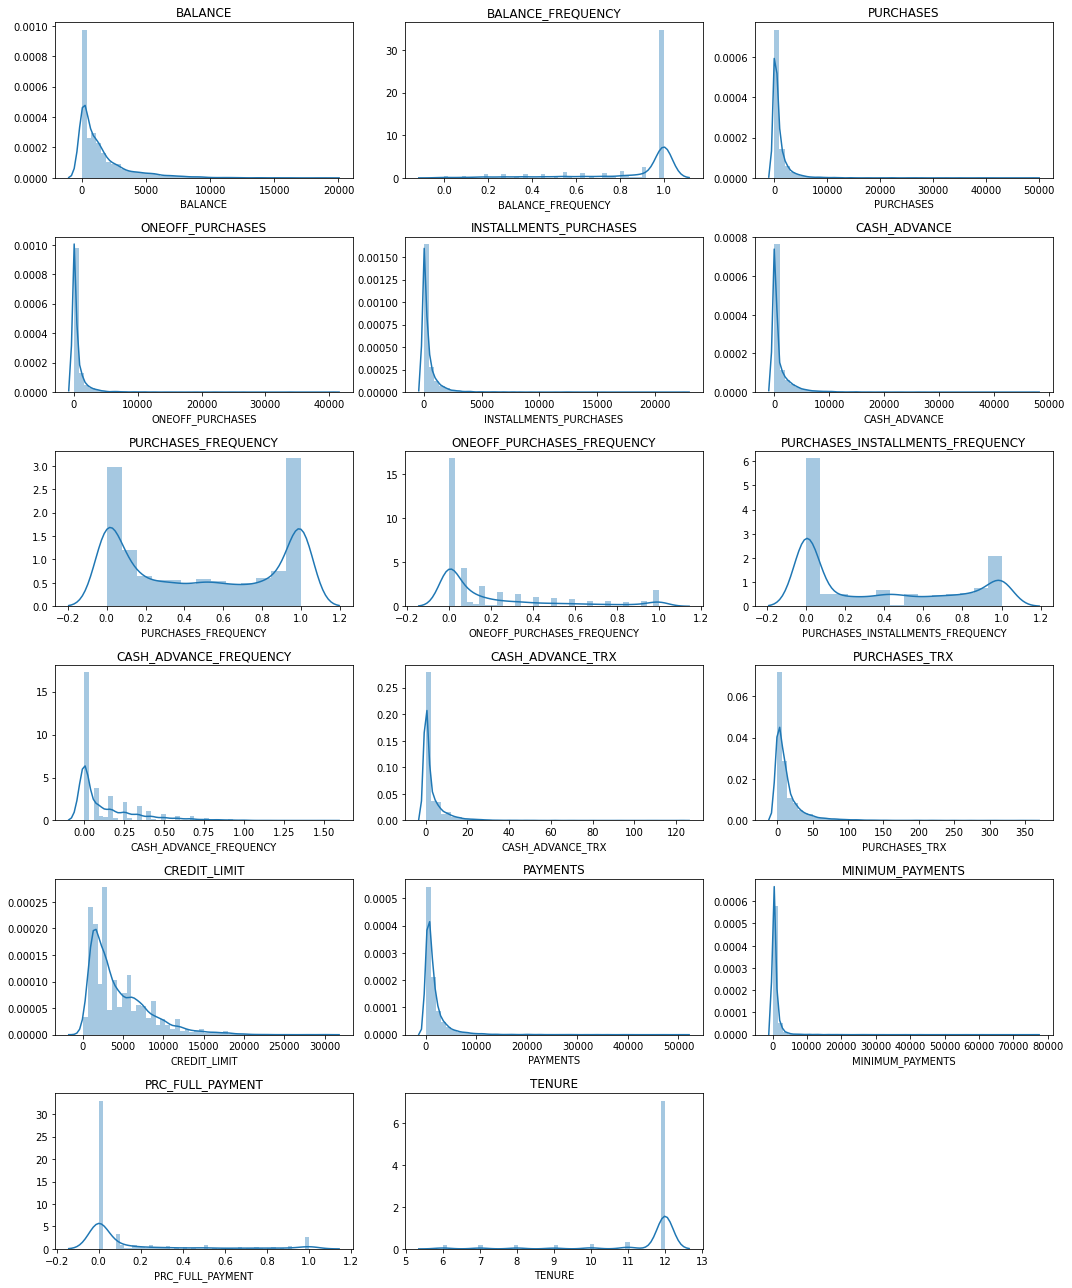

In [6]:
graph_by_variables = data.columns
plt.figure(figsize = (15, 18))
for i in range(0, 17):
    plt.subplot(6, 3, i+1)
    sns.distplot(data[graph_by_variables[i]])
    plt.title(graph_by_variables[i])
plt.tight_layout()

- Visualise the Correlation Map

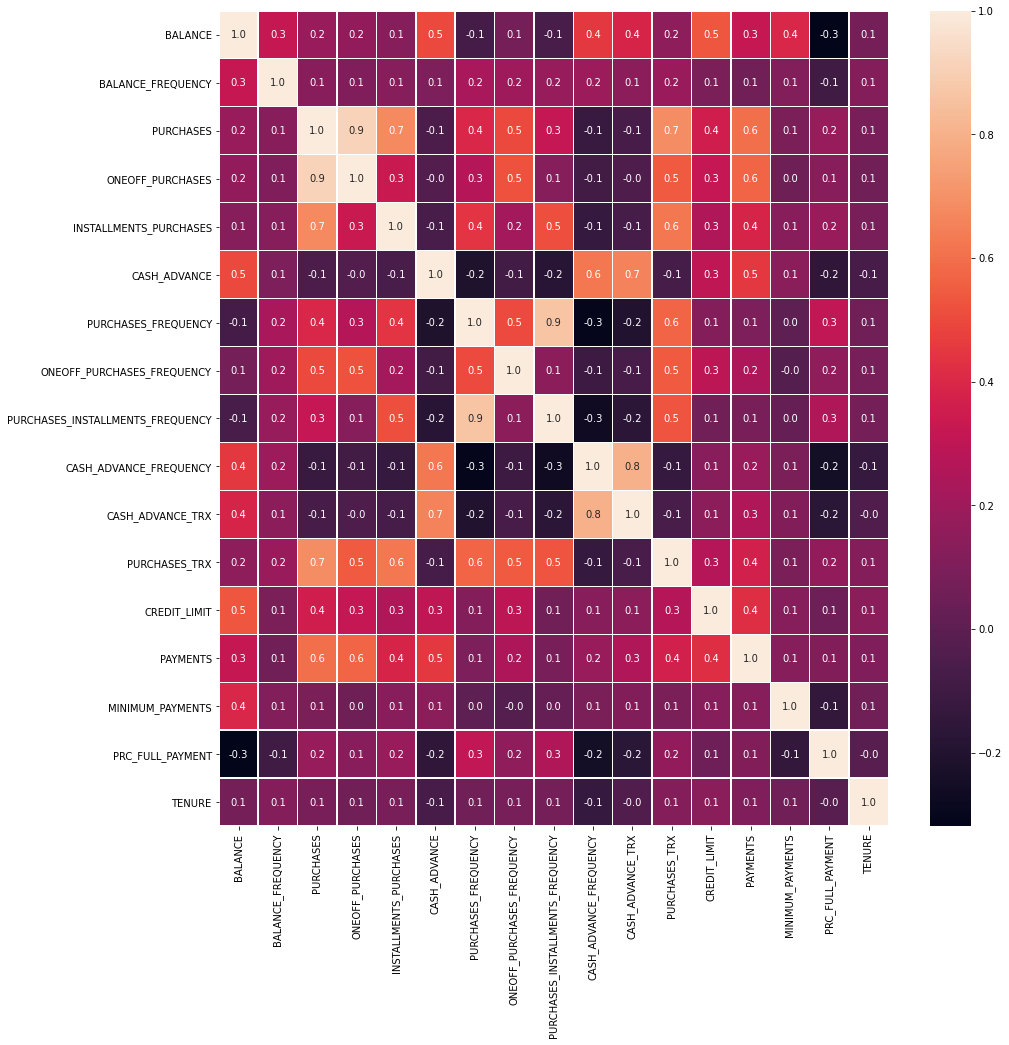

In [7]:
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = 0.5, fmt = '.1f', ax = ax)

- Scale Features

In [8]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
data_s = standardscaler.fit_transform(data)
data_s[:2]

array([[-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
        -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
        -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, -0.35693402, -0.45457623,
         2.60560451, -1.22175806, -0.67866081, -0.91699519,  0.57396272,
         0.11007385, -0.59179588,  0.68863903,  0.81864213,  0.08931021,
         0.2342269 ,  0.36067954]])

### Clustering Analysis - K-Means

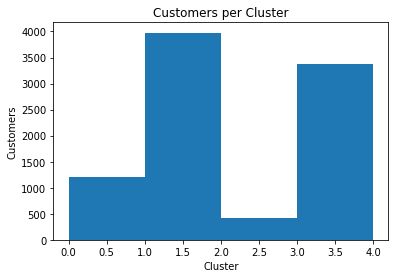

In [10]:
from sklearn.cluster import KMeans
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state = 628)
labels = kmeans.fit_predict(data_s)

# plot cluster sizes
plt.hist(labels, bins = range(n_clusters + 1))
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

- Determining Number of Clusters with Elbow Method

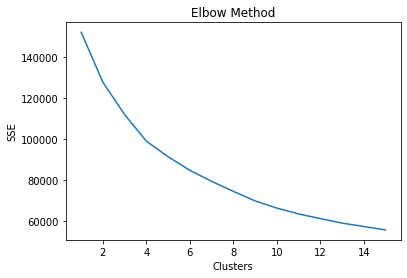

In [11]:
sse = []
cluster_list = range(1, 16)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, random_state = 628)
    kmeans.fit(data_s)
    sse.append(kmeans.inertia_)
plt.plot(cluster_list, sse)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

Do not have a clear elbow

- Determining Number of Clusters with Silhouette Scores Method

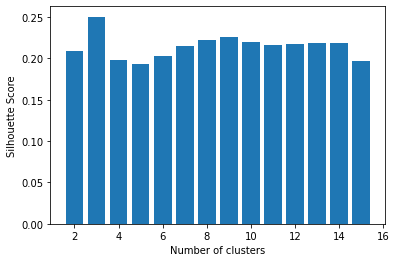

In [12]:
from sklearn.metrics import silhouette_score
s = [] 
cluster_list = range(2, 16)
for i in cluster_list:
    kmeans = KMeans(n_clusters = i, random_state = 628)
    s.append(silhouette_score(data_s, kmeans.fit_predict(data_s))) 
    
# Plotting a bar graph to compare the results 
plt.bar(cluster_list, s) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

The model with three clusters gives the highest score.

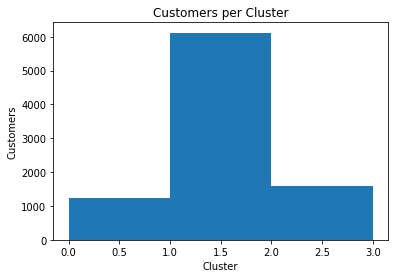

In [13]:
kmeans = KMeans(n_clusters = 3, random_state = 628) 
labels = kmeans.fit_predict(data_s)
data["cluster"] = labels
# plot cluster sizes
plt.hist(labels, bins = range(4))
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

Understanding Clusters by Customer Segmentation

[[ 0.31411434  0.43963814  1.53197429  1.28463437  1.26181538 -0.24913173
   1.14292789  1.56565979  0.95562738 -0.36179858 -0.25334951  1.68439444
   0.88842105  0.83873014  0.15529748  0.49568752  0.30301268]
 [-0.36769435 -0.17753442 -0.23276231 -0.20432348 -0.17488305 -0.30967801
  -0.06276745 -0.2348177  -0.04837688 -0.3342852  -0.29867037 -0.24357808
  -0.33619891 -0.28441994 -0.13552477  0.00749457 -0.02869172]
 [ 1.16548758  0.34103571 -0.28852722 -0.20695761 -0.30207032  1.37705476
  -0.63965444 -0.30659342 -0.55053833  1.55797342  1.3381713  -0.3644726
   0.60280864  0.44288506  0.3991497  -0.41029275 -0.12346171]]


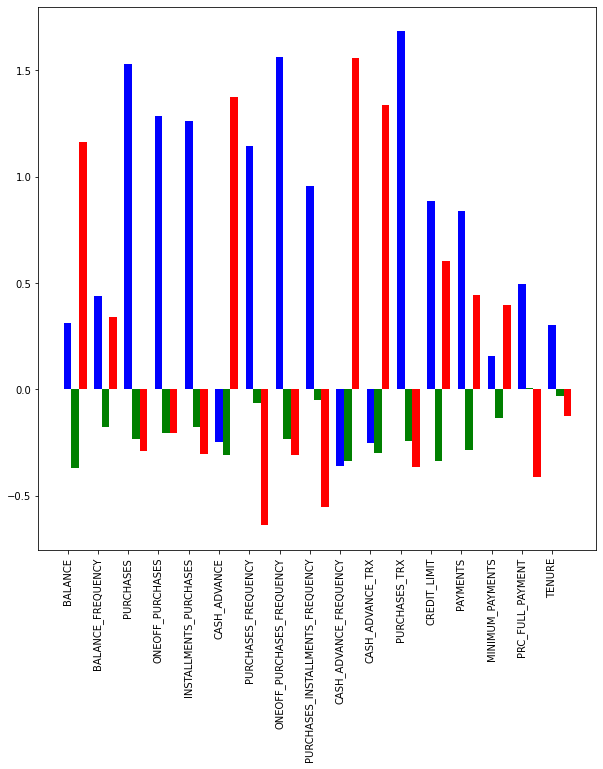

In [14]:
plt.subplots(figsize = (10, 10))
centers = kmeans.cluster_centers_
print(centers)
idx = np.arange(17)
plt.bar(idx, centers[0], color = 'b', width = 0.25, tick_label = graph_by_variables)
plt.bar(idx + 0.25, centers[1], color = 'g', width = 0.25)
plt.bar(idx + 0.50, centers[2], color = 'r', width = 0.25)
plt.xticks(rotation = 90)
plt.show()

Show Clustering Results on Important Columns

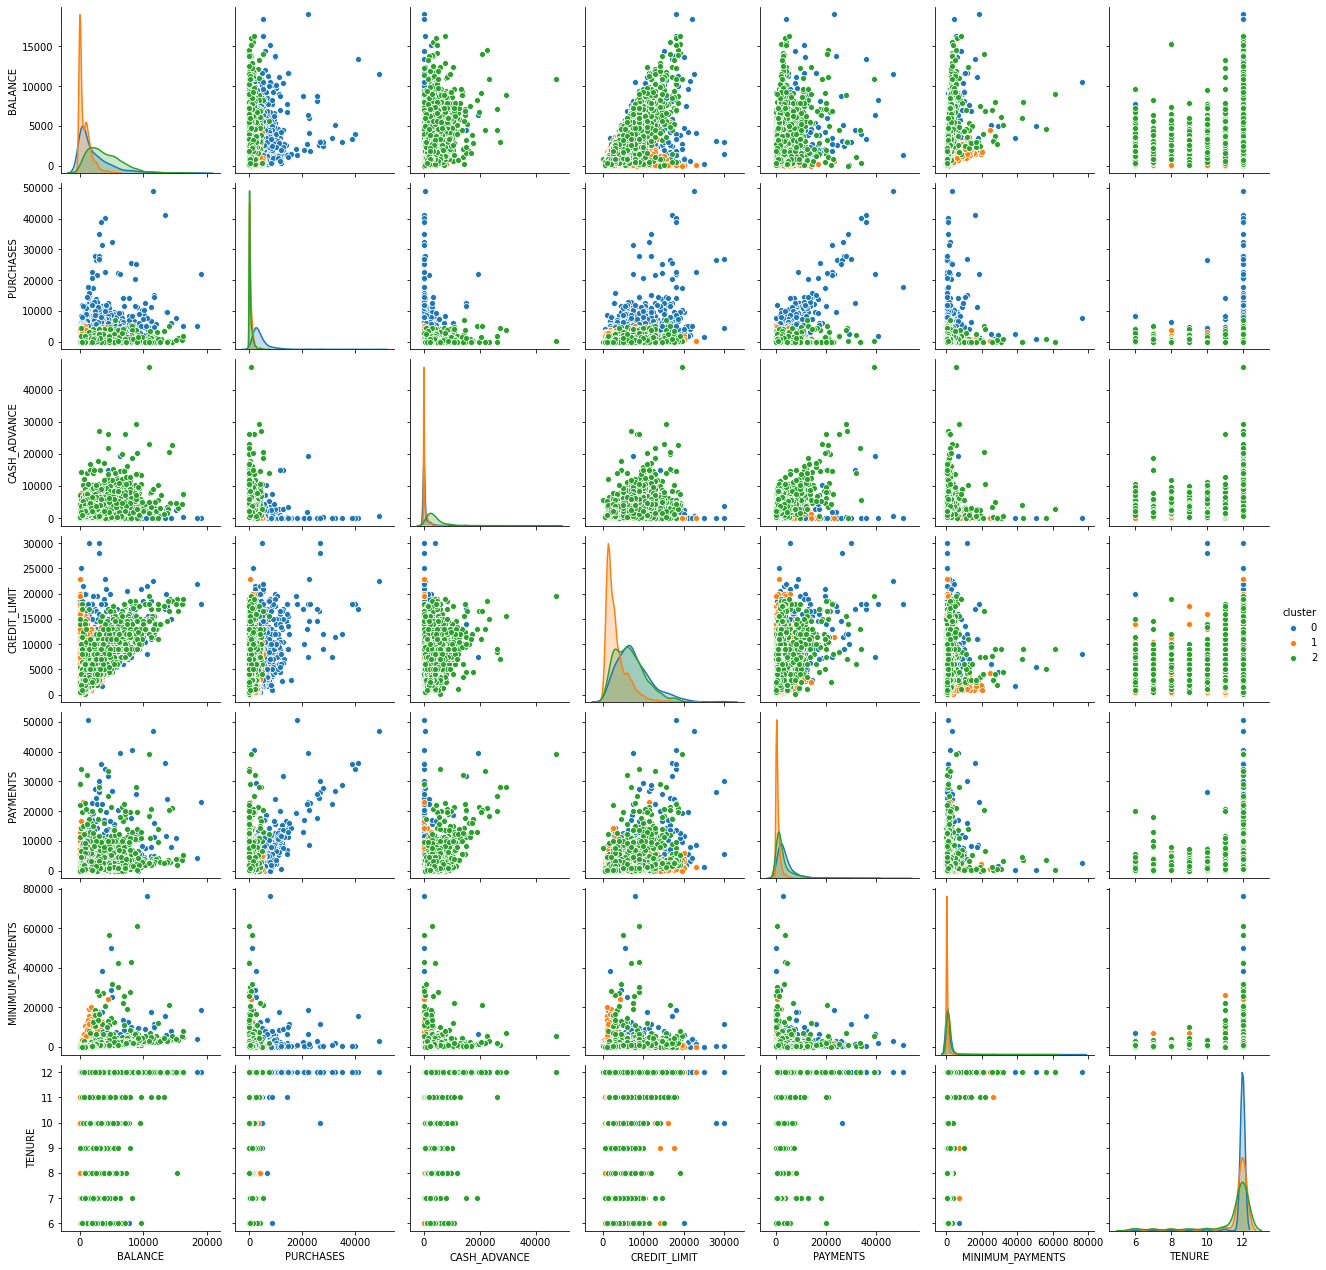

In [15]:
imp_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]
imp_cols.append("cluster")
sns.pairplot(data[imp_cols], hue = "cluster")

### Clustering Analysis - Hierarchical Clustering
- By sklearn.cluster

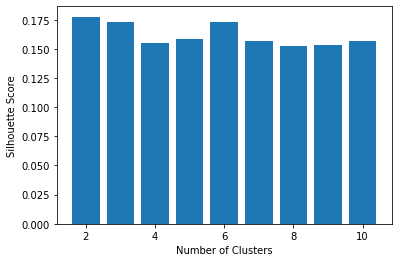

In [16]:
from sklearn.cluster import AgglomerativeClustering
s = [] 
cluster_list = range(2, 11)
for i in cluster_list:
    hc = AgglomerativeClustering(n_clusters = i)
    s.append(silhouette_score(data_s, hc.fit_predict(data_s)))
    
# Plotting a bar graph to compare the results 
plt.bar(cluster_list, s) 
plt.xlabel('Number of Clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

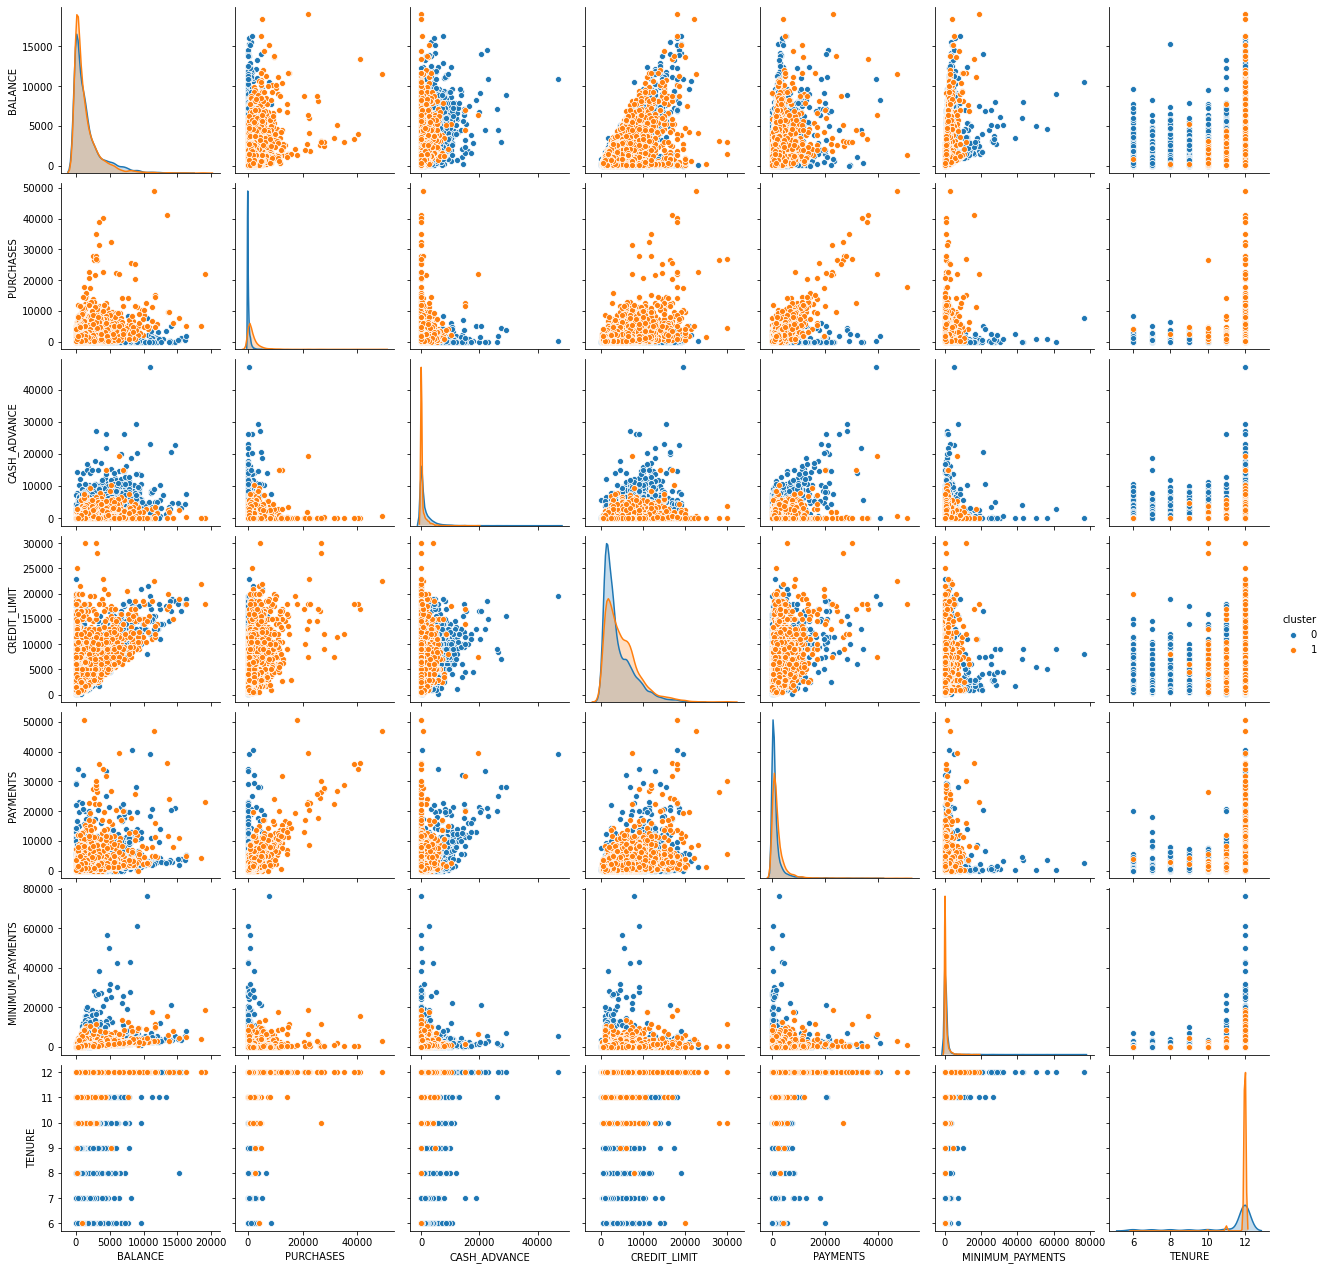

In [17]:
hc = AgglomerativeClustering(n_clusters = 2)
labels = hc.fit_predict(data_s)
data["cluster"] = labels
sns.pairplot(data[imp_cols], hue = "cluster")

- By scipy.cluster

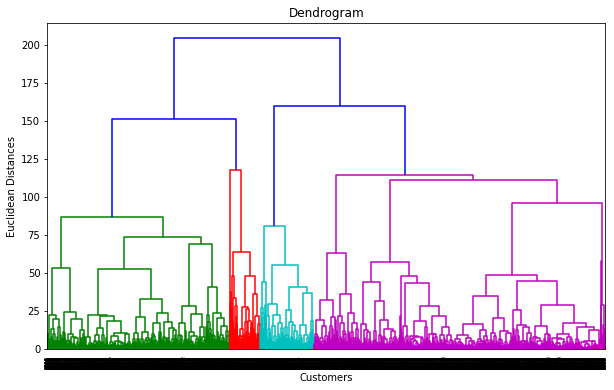

In [18]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (10, 6))
linked = sch.linkage(data_s, method = 'ward')
dendrogram = sch.dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

### Clustering Analysis - DBSCAN

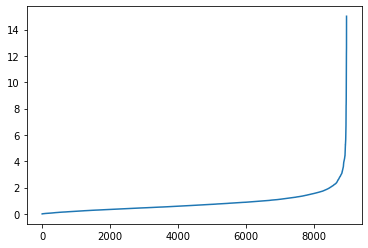

In [19]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(data_s)
distances, indices = nbrs.kneighbors(data_s)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.plot(distances)

Until around 8000th variable eps is under 2. Density is too much in the general data set.

In [24]:
from sklearn.cluster import DBSCAN
s = []
for eps in np.arange(0.2, 2, 0.2):
    for min_sample in range(1, 10):
        dbscan = DBSCAN(eps = eps, min_samples = min_sample)
        dbscan.fit(data_s)
        sil_score = silhouette_score(data_s, dbscan.labels_, metric = 'euclidean')
        s.append((eps, min_sample, sil_score, len(set(dbscan.labels_))))
        
df_dbscan = pd.DataFrame(s, columns = ['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [25]:
df_dbscan.sort_values('sil_score', ascending=False).head()

,eps,min_samples,sil_score,number_of_clusters
77,1.8,6,0.430408,2
78,1.8,7,0.425563,2
79,1.8,8,0.421537,2
80,1.8,9,0.418741,2
70,1.6,8,0.327977,3


In [30]:
dbscan = DBSCAN(eps = 1.8, min_samples = 6)
labels = dbscan.fit_predict(data_s)

data["cluster"] = labels
print(data["cluster"].value_counts())


 0    8092
-1     858
Name: cluster, dtype: int64


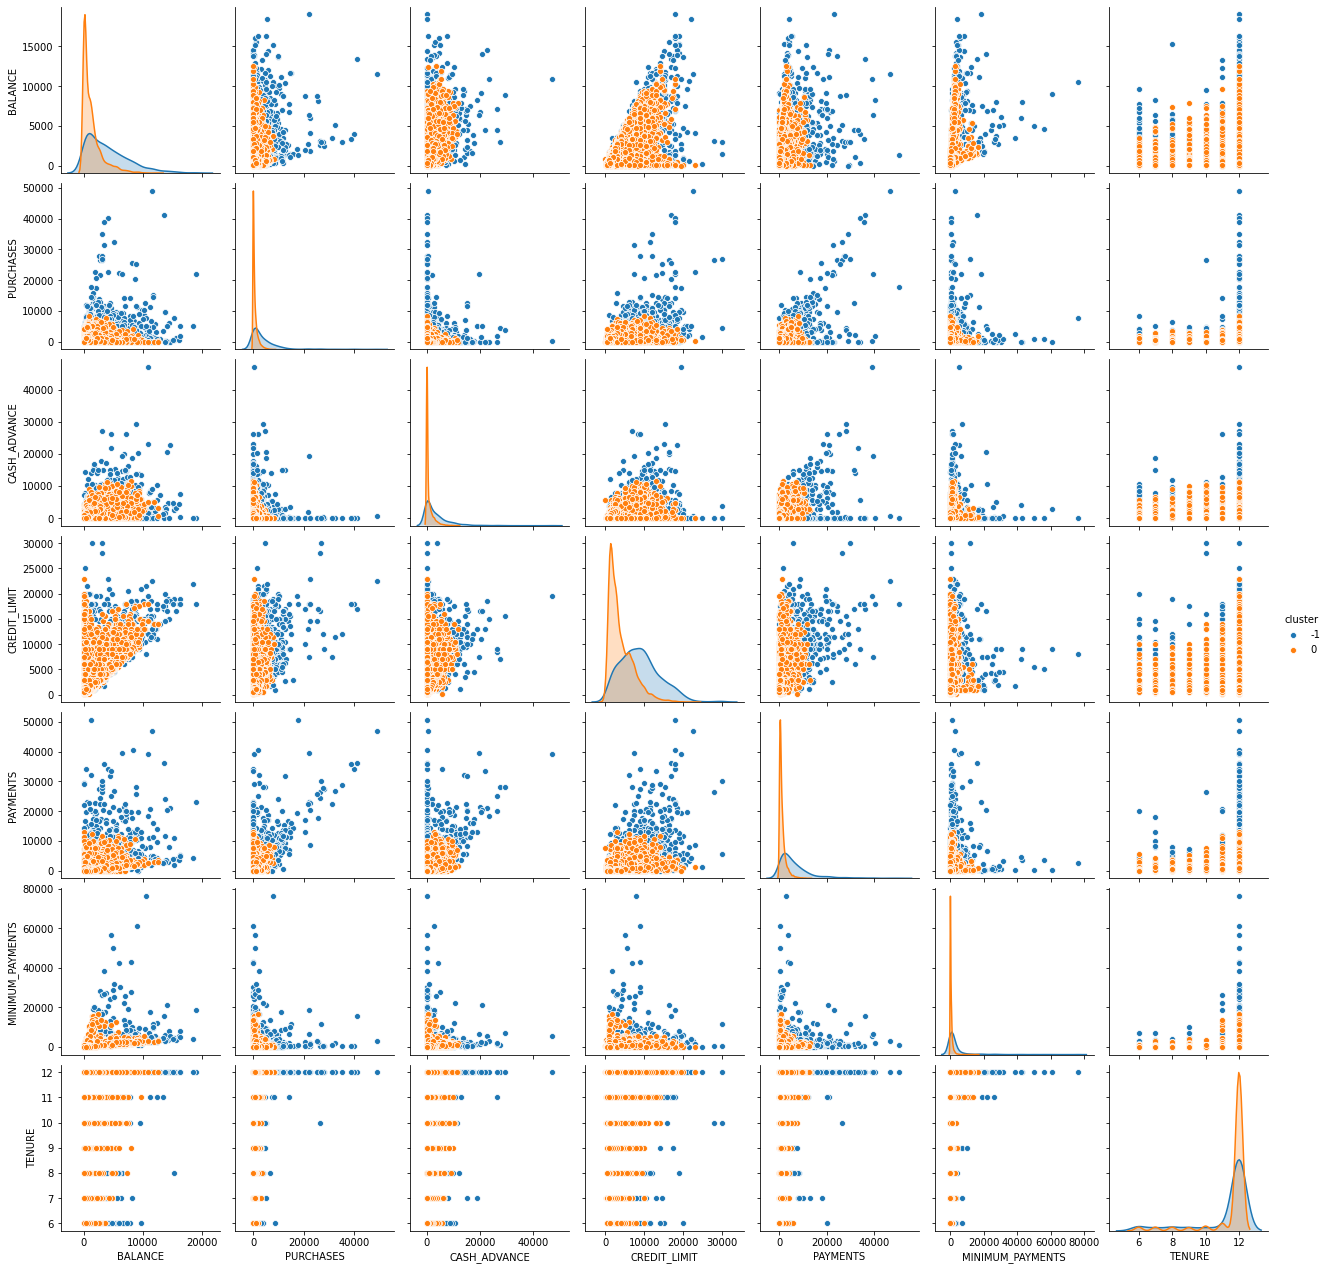

In [31]:
sns.pairplot(data[imp_cols], hue = "cluster")